In [124]:
import numpy as np
from scipy import io

In [125]:
data1 = io.loadmat('ex4data1.mat')
X = data1['X']
y = data1['y']
weights = io.loadmat('ex4weights.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']

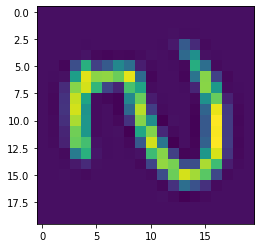

In [126]:
import matplotlib.pyplot as plt
import random
ax = plt.subplot(111)
index = random.randint(1,5000)
ax.imshow(X[index].reshape(20,20))
plt.show()

In [127]:
def serialization(y, classes):
    ret = np.zeros((y.shape[0],classes))
    for i,j in enumerate(y.ravel()):
        tmp = np.zeros((classes))
        tmp[j-1] = 1
        ret[i] = tmp
    return ret

In [128]:
serial_y = serialization(y, 10)
print(serial_y.shape)

(5000, 10)


In [129]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [130]:
def hTheta(theta1, theta2, x):
    output1 = sigmoid(np.dot(x, theta1.T))
    output1 = np.insert(output1, 0, 1, axis=1)
    output2 = sigmoid(np.dot(output1, theta2.T))
    return output2

def nnCostFunction(theta1, theta2, X, y):
    X = np.insert(X, 0, 1, axis=1)
    y = serialization(y, 10)
    loss = 0.0
    for i in range(X.shape[0]):
        X_i = np.matrix(X[i,:])
        y_i = np.matrix(y[i,:])
        theta1 = np.matrix(theta1)
        theta2 = np.matrix(theta2)
        pos = np.multiply(-y_i, np.log(hTheta(theta1, theta2, X_i)))
        neg = np.multiply((1-y_i), np.log(1-hTheta(theta1, theta2, X_i)))
        loss_i = np.sum(pos - neg)
        loss += loss_i
    loss /= len(y)
    return loss

In [131]:
print(nnCostFunction(theta1,theta2,X,y))

0.2876291651613188


In [132]:
def nnCostFunctionReg(theta1, theta2, X, y, r):
    X = np.insert(X, 0, 1, axis=1)
    y = serialization(y, 10)
    loss = 0.0
    for i in range(X.shape[0]):
        X_i = np.matrix(X[i,:])
        y_i = np.matrix(y[i,:])
        theta1 = np.matrix(theta1)
        theta2 = np.matrix(theta2)
        pos = np.multiply(-y_i, np.log(hTheta(theta1, theta2, X_i)))
        neg = np.multiply((1-y_i), np.log(1-hTheta(theta1, theta2, X_i)))
        loss_i = np.sum(pos - neg)
        loss += loss_i
    loss /= len(y)
    reg = (r / (2 * len(y))) * (np.sum(np.multiply(theta1,theta1)) + np.sum(np.multiply(theta2,theta2)))
    loss += reg
    return loss

def nnCostFunctionReg1(theta1, theta2, X, y, r):
    X = np.insert(X, 0, 1, axis=1)
    y = serialization(y, 10)
    pos = np.multiply(-y, np.log(hTheta(theta1,theta2,X)))
    neg = np.multiply((1-y),np.log(1-hTheta(theta1,theta2,X)))
    reg = (r / 2) * (np.sum(np.multiply(theta1,theta1)) + np.sum(np.multiply(theta2,theta2)))
    loss = (np.sum(pos - neg) + reg) / len(y)
    return loss

In [133]:
print(nnCostFunctionReg(theta1,theta2,X,y,1))
print(nnCostFunctionReg1(theta1,theta2,X,y,1))

0.38448779624289386
0.384487796242894


### 2.1 Sigmoid Gradient

In [134]:
def sigmoidGradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

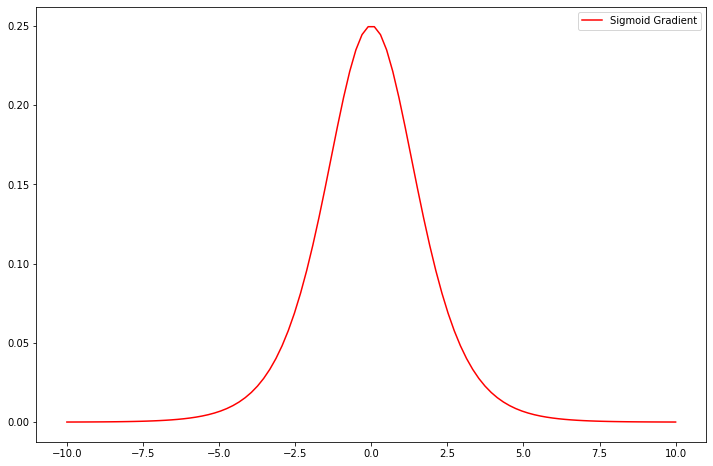

In [135]:
test_x = np.linspace(-10, 10, 100)
test_y = sigmoidGradient(test_x)
_, ax = plt.subplots(figsize=(12,8))
ax.plot(test_x, test_y, c='r', label='Sigmoid Gradient')
ax.legend(loc='best')
plt.show()

### 2.2 Random initialization

In [136]:
new_theta1 = (np.random.rand(theta1.shape[0],theta1.shape[1])-0.5)*0.24
new_theta2 = (np.random.rand(theta2.shape[0],theta2.shape[1])-0.5)*0.24

In [138]:
print(nnCostFunctionReg1(new_theta1,new_theta2,X,y,1))

6.721920829120396
